In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read CSV
dataset = pd.read_csv('Project_Data_1.csv')

In [3]:
#Check for null values
dataset.isnull().sum()

Sales of Wheat in tons    0
1990                      0
1991                      0
1992                      0
1993                      0
1994                      0
1995                      0
1996                      0
1997                      0
1998                      0
1999                      0
2000                      0
2001                      0
2002                      0
2003                      0
2004                      0
2005                      0
2006                      0
2007                      0
dtype: int64

In [4]:
#Rename header
dataset = dataset.rename(columns={'Sales of Wheat in tons':'Country'})

In [5]:
dataset.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [6]:
#Check DType
dataset.dtypes

Country    object
1990       object
1991       object
1992       object
1993       object
1994       object
1995       object
1996        int64
1997        int64
1998        int64
1999        int64
2000        int64
2001        int64
2002        int64
2003        int64
2004       object
2005       object
2006       object
2007       object
dtype: object

In [7]:
#Change Data Types to int 
dataset.iloc[:,1:] = dataset.iloc[:,1:].replace(",","", regex=True).astype('int64')

In [8]:
#Check DType
dataset.dtypes

Country    object
1990        int64
1991        int64
1992        int64
1993        int64
1994        int64
1995        int64
1996        int64
1997        int64
1998        int64
1999        int64
2000        int64
2001        int64
2002        int64
2003        int64
2004        int64
2005        int64
2006        int64
2007        int64
dtype: object

In [9]:
#select x-vlaues
x = dataset.iloc[:,1:].values

K-Means

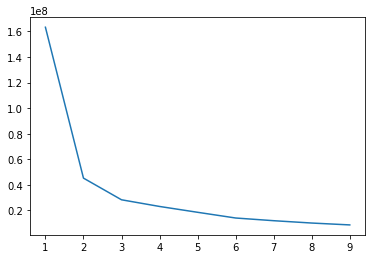

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)

In [11]:
kmeans = KMeans(n_clusters=3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)

In [12]:
dataset = pd.concat([dataset,pd.DataFrame(y_kmeans)],axis=1)
dataset = dataset.rename(columns={0:'K-Mean Cluster Number'})

In [13]:
dataset.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,K-Mean Cluster Number
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,0
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,1
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,1
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,1
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,1


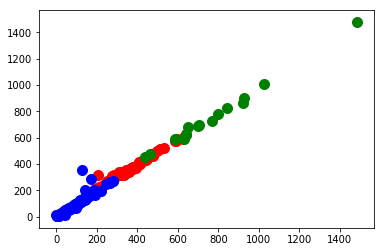

In [14]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label='Cluster3')

Hierarchical Clusetering 

Text(0, 0.5, 'Euclidean Distance')

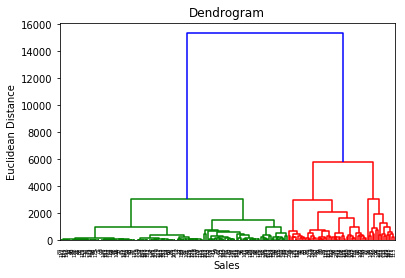

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Sales')
plt.ylabel('Euclidean Distance')

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

In [17]:
dataset = pd.concat([dataset,pd.DataFrame(y_hc)],axis=1)
dataset = dataset.rename(columns={0:'Hierarchical Cluster Number'})

In [18]:
dataset.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,K-Mean Cluster Number,Hierarchical Cluster Number
0,Afghanistan,436,429,422,415,407,397,397,387,374,...,346,326,304,308,283,267,251,238,0,0
1,Albania,42,40,41,42,42,43,42,44,43,...,40,34,32,32,29,29,26,22,1,1
2,Algeria,45,44,44,43,43,42,43,44,45,...,48,49,50,51,52,53,55,56,1,1
3,American Samoa,42,14,4,18,17,22,0,25,12,...,8,6,5,6,9,11,9,5,1,1
4,Andorra,39,37,35,33,32,30,28,23,24,...,20,20,21,18,19,18,17,19,1,1


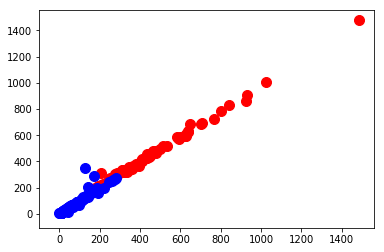

In [19]:
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')